**Atualizando a biblioteca para plotagem de gráficos**


In [ ]:
!pip -q install plotly --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 83.3 MB/s eta 0:00:00


**Importando bibliotecas**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

**Abrindo um arquivo CSV do drive**

In [ ]:
caminhoTitanic = 'train.csv'
base = pd.read_csv(caminhoTitanic)


Verificando e entendendo base de dados

In [ ]:
# Visualizar as primeiras linhas
print(base.head())

# Verificar informações gerais e valores nulos
print(base.info())

# Resumo estatístico das colunas numéricas
print(base.describe())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

Ajustando colunas relevantes

In [ ]:
# Selecionando as colunas que vamos usar
base = base[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

# Tratando valores nulos (substituímos idades ausentes pela mediana)
base['Age'].fillna(base['Age'].median(), inplace=True)

# Preenchendo valores nulos da coluna 'Embarked' com o valor mais frequente
base['Embarked'].fillna(base['Embarked'].mode()[0], inplace=True)


<ipython-input-7-369e168d30ee>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  base['Age'].fillna(base['Age'].median(), inplace=True)
<ipython-input-7-369e168d30ee>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base['Age'].fillna(base['Age'].median(), inplace=True)
<ipython-input-7-369e168d30ee>:8: FutureWarning: A value is trying to be se

In [ ]:
base

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,28.0,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


**Tratamento de dados categóricos**

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Carregar dados e selecionar colunas
base = pd.read_csv('train.csv')
base = base[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']].copy()

# Preencher valores nulos
base['Age'].fillna(base['Age'].median(), inplace=True)
base['Embarked'].fillna(base['Embarked'].mode()[0], inplace=True)

# Aplicar OneHotEncoder
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['Sex', 'Embarked'])
], remainder='passthrough')

# Transformar e converter para DataFrame
X = transformer.fit_transform(base.drop(columns=['Survived']))
feature_names = transformer.get_feature_names_out()
X = pd.DataFrame(X, columns=feature_names)
y = base['Survived']



<ipython-input-36-ac23b68f192a>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  base['Age'].fillna(base['Age'].median(), inplace=True)
<ipython-input-36-ac23b68f192a>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t



>** OneHotEncoder - Agora vamos binarizar atributos não ordinais**

**Separar o dataset em variáveis independentes (X_prev) e dependentes (y_classe)**

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
# Definir variáveis preditoras (X) e variável alvo (y)
X = base.drop(columns=['Survived'])
y = base['Survived']


**Método de amostragem Holdout**

In [ ]:
from sklearn.model_selection import train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
import pickle

In [ ]:
with open('titanic.pkl', mode='wb') as f:
    pickle.dump([X_treino, X_teste, y_treino, y_teste], f)


Plotando graficos

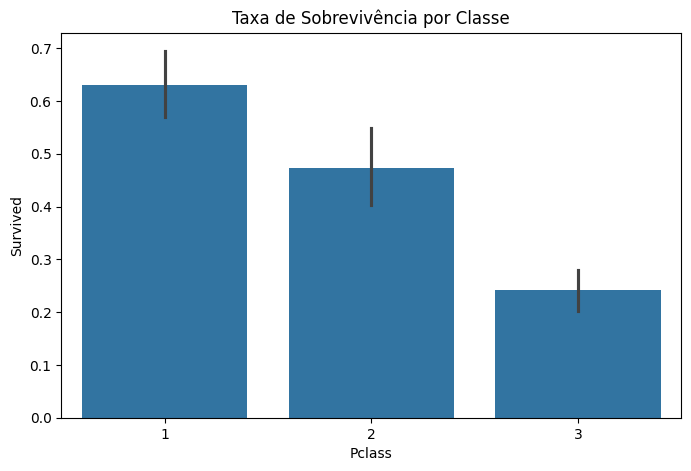

In [39]:
# Gráfico 1: Sobrevivência por Classe
plt.figure(figsize=(8, 5))
sns.barplot(x='Pclass', y='Survived', data=base)
plt.title('Taxa de Sobrevivência por Classe')
plt.show()



Grafico 2: Distribuição de Idades

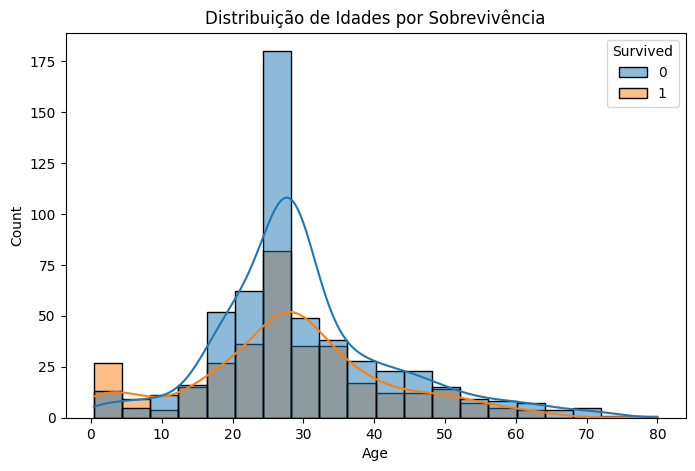

In [38]:
# Gráfico 2: Distribuição de Idades
plt.figure(figsize=(8, 5))
sns.histplot(data=base, x='Age', hue='Survived', kde=True, bins=20)
plt.title('Distribuição de Idades por Sobrevivência')
plt.show()

Grafico 3: Sobrevivencia por sexo

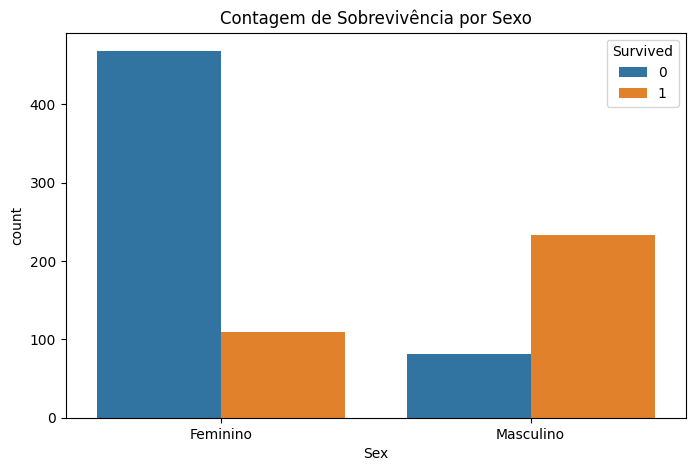

In [40]:
# Gráfico 3: Sobrevivência por Sexo
plt.figure(figsize=(8, 5))
sns.countplot(x='Sex', hue='Survived', data=base)
plt.title('Contagem de Sobrevivência por Sexo')
plt.xticks([0, 1], ['Feminino', 'Masculino'])
plt.show()

Grafico 4: Matriz de correlação

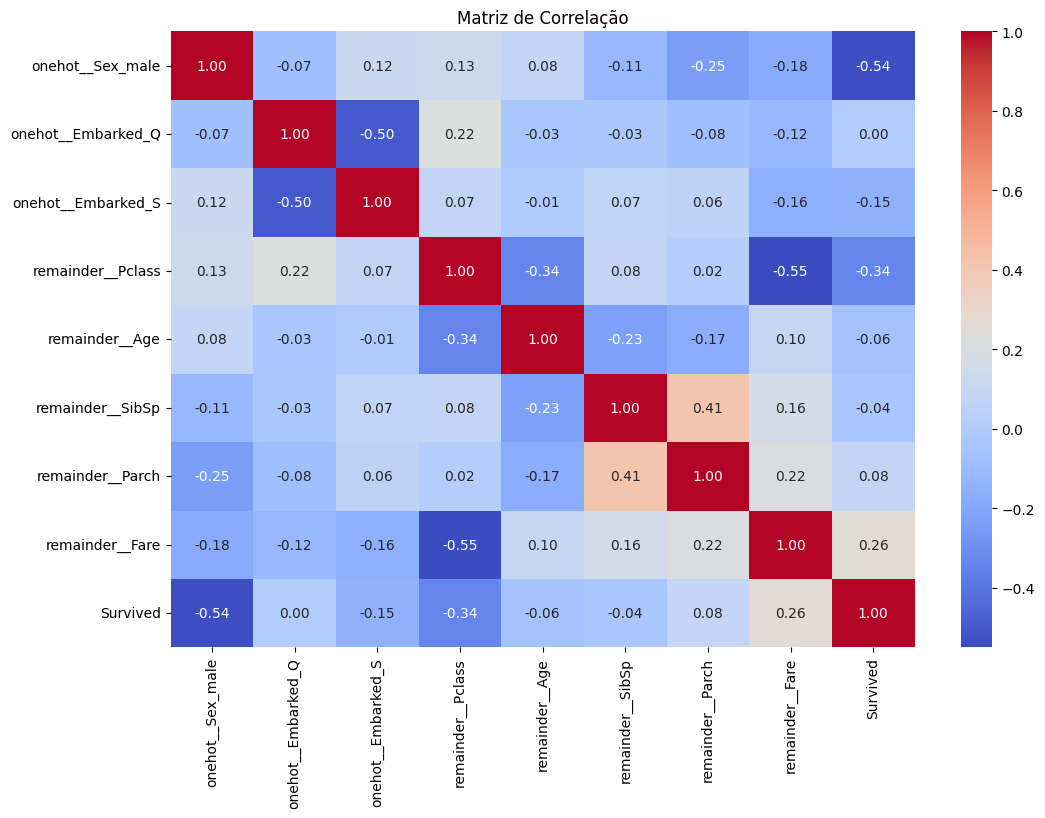

In [41]:
# Juntar features transformadas com a variável alvo para correlação
base_corr = pd.concat([X, y], axis=1)

# Gráfico 4: Matriz de Correlação
plt.figure(figsize=(12, 8))
sns.heatmap(base_corr.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()